In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
def parse_data(filename, _try, _rec):
    with open(filename, 'r') as f:
        for line in f:
            if line:
                s = re.split(r'\t', line)
                try_and_rec = s[1][1:-2].split(', ', 1)
                if len(try_and_rec) == 0:
                    break
                if try_and_rec[0].startswith('try:'):
                    keys = try_and_rec[0][4:].split(' ', 1)
                    for key in keys:
                        _try[key] += 1
                    if len(try_and_rec) > 1:
                        key = try_and_rec[1][12:]
                        _rec[key] += 1
                else:
                    key = try_and_rec[0][12:]
                    _rec[key] += 1
                    if len(try_and_rec) > 1:
                        keys = try_and_rec[1][4:].split(' ', 1)
                        for key in keys:
                            _try[key] += 1

In [3]:
%%time

_try = {'comedy': 0, 'electronic': 0, 'country': 0, 'instrumental': 0, 'disney': 0, 'classical': 0, 'inspirational': 0, 'pop': 0, 'hip-hop/rap': 0, 'jazz': 0, 'rock': 0, 'r&b/soul': 0, 'blues': 0}
_rec = {'comedy': 0, 'electronic': 0, 'country': 0, 'instrumental': 0, 'disney': 0, 'classical': 0, 'inspirational': 0, 'pop': 0, 'hip-hop/rap': 0, 'jazz': 0, 'rock': 0, 'r&b/soul': 0, 'blues': 0}

data_file = '../music-final'
parse_data(data_file, _try, _rec)

CPU times: user 2.18 s, sys: 30.8 ms, total: 2.21 s
Wall time: 2.21 s


In [4]:
_try

{'comedy': 3,
 'electronic': 21,
 'country': 33,
 'instrumental': 220,
 'disney': 220,
 'classical': 1145,
 'inspirational': 1145,
 'pop': 1010431,
 'hip-hop/rap': 2487,
 'jazz': 335,
 'rock': 310,
 'r&b/soul': 97,
 'blues': 2}

In [5]:
_rec

{'comedy': 96136,
 'electronic': 4117,
 'country': 21673,
 'instrumental': 10727,
 'disney': 4291,
 'classical': 9509,
 'inspirational': 44705,
 'pop': 19490,
 'hip-hop/rap': 6697,
 'jazz': 39897,
 'rock': 31318,
 'r&b/soul': 8789,
 'blues': 38314}

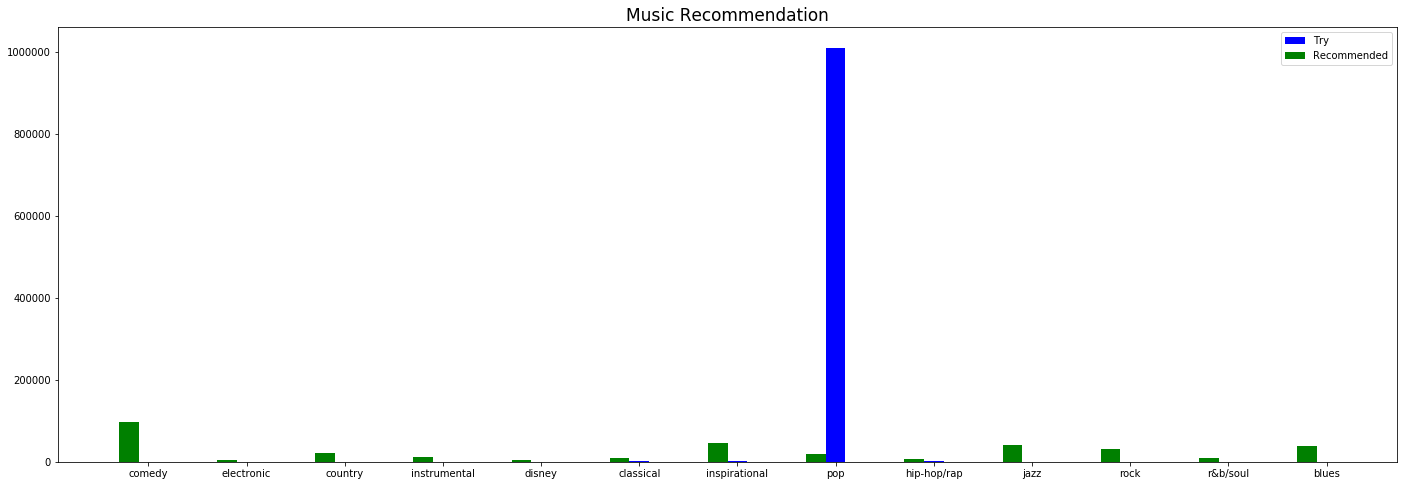

In [6]:
plt.figure(figsize=(24,8))
X = np.arange(len(_try))
ax = plt.subplot(111)
ax.bar(X, _try.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, _rec.values(), width=0.2, color='g', align='center')
ax.legend(('Try','Recommended'))
plt.xticks(X, _try.keys())
plt.title("Music Recommendation", fontsize=17)
plt.show()